In [97]:
# Importar las librerias o paquetes que necesitemos
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.cluster import KMeans
from ipywidgets import ColorPicker, VBox, interact, interactive, fixed
import struct
import ipyvolume as ipv

In [2]:
dataset = pd.read_csv('data.csv', engine = 'c')

In [3]:
dataset.head(10)

,Power,I1,I2,I3,V1,V2,V3,V4,V5,V6,...,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48
0,9751.855054,7.824120,7.711217,7.659327,26.981230,26.981230,26.973406,26.981230,26.981230,26.981230,...,25.923836,25.923836,25.916177,25.923836,25.923836,25.923836,25.923836,25.916177,25.923836,25.923836
1,9327.646501,7.493863,7.377357,7.315667,26.595084,26.590496,26.581026,26.581640,26.578936,26.585754,...,26.130718,26.121655,26.121467,26.123370,26.125228,26.124651,26.115087,26.125892,26.122222,26.119418
2,9343.714000,7.504908,7.394960,7.328464,26.558807,26.554412,26.545014,26.545930,26.543340,26.549870,...,26.101107,26.092450,26.091930,26.094089,26.095863,26.095312,26.086177,26.096156,26.092992,26.090314
3,9344.852760,7.505353,7.400048,7.327035,26.517370,26.512969,26.503568,26.504474,26.501881,26.508420,...,26.082333,26.073660,26.073154,26.075302,26.077079,26.076527,26.067376,26.077387,26.074203,26.071521
4,9360.422049,7.516942,7.404808,7.343132,26.582297,26.577895,26.568483,26.569400,26.566807,26.573346,...,26.121293,26.112622,26.112098,26.114264,26.116041,26.115489,26.106339,26.116331,26.113165,26.110483
5,9361.099294,7.531721,7.402142,7.331605,26.625096,26.620688,26.611258,26.612180,26.609582,26.616132,...,26.099529,26.090840,26.090342,26.092485,26.094266,26.093712,26.084543,26.094584,26.091384,26.088696
6,9366.481086,7.512993,7.406527,7.357298,26.607423,26.603006,26.593591,26.594481,26.591879,26.598441,...,26.161272,26.152596,26.152062,26.154238,26.156017,26.155464,26.146309,26.156297,26.153139,26.150456
7,9366.318361,7.529466,7.405326,7.341772,26.630008,26.625602,26.616175,26.617098,26.614502,26.621048,...,26.124712,26.116005,26.115511,26.117653,26.119438,26.118884,26.109696,26.119761,26.116550,26.113857
8,9370.390506,7.538042,7.400529,7.344210,26.709896,26.705480,26.696040,26.696958,26.694355,26.700916,...,26.145368,26.136680,26.136169,26.138325,26.140105,26.139552,26.130384,26.140410,26.137224,26.134537
9,9353.257979,7.511863,7.400028,7.336602,26.584626,26.580205,26.570790,26.571673,26.569068,26.575636,...,26.117277,26.108586,26.108085,26.110231,26.112013,26.111459,26.102288,26.112327,26.109130,26.106442


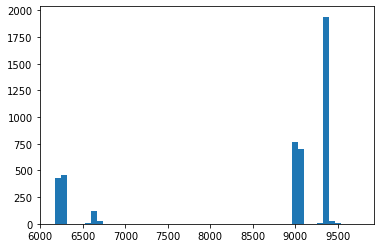

In [7]:
plt.hist(dataset['Power'], bins = 50)
plt.show()

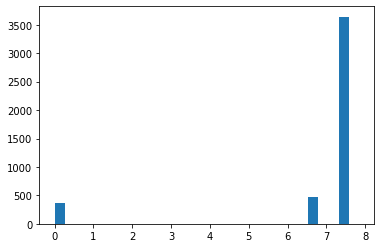

In [8]:
plt.hist(dataset['I1'], bins= 30)
plt.show()

In [15]:
temporal_no_normal = dataset[dataset['Power'] < 9200]

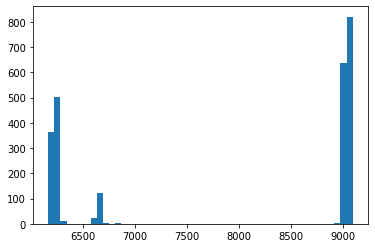

In [16]:
plt.hist(temporal_no_normal['Power'], bins= 50)
plt.show()

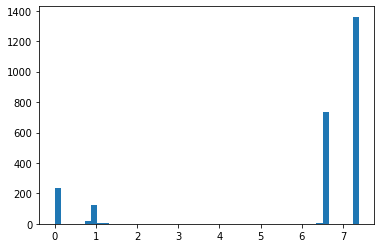

(2493, 52)

In [23]:
plt.hist(temporal_no_normal['I3'], bins= 50)
plt.show()
temporal_no_normal.shape

In [39]:
temporal_normal = dataset[dataset['Power'] > 9200]

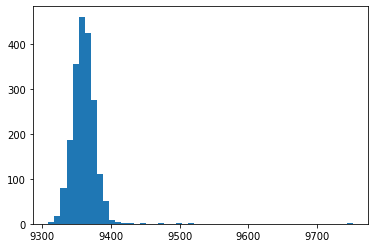

(1985, 52)

In [40]:
plt.hist(temporal_normal['Power'], bins= 50)
plt.show()

temporal_normal.shape

In [49]:
dataset['fallo'] = dataset['Power'].apply(lambda x : 1 if x < 9200 else 0)

In [42]:
dataset['fallo'].value_counts()

1    2493
0    1985
Name: fallo, dtype: int64

In [43]:
y = dataset.pop('fallo')
x = dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(penalty='l2', C=0.4, max_iter=1000, solver='lbfgs')
logisticRegr.fit(x_train, y_train)
predictions = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test, y_test)

In [44]:
score

1.0

In [45]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[488   0]
 [  0 632]]


In [54]:
scaler = StandardScaler()
dataset_scaled = scaler.fit_transform(dataset)
dataset_scaled = pd.DataFrame(dataset_scaled, columns= dataset.columns)

In [55]:
dataset_scaled.head()

,Power,I1,I2,I3,V1,V2,V3,V4,V5,V6,...,V40,V41,V42,V43,V44,V45,V46,V47,V48,fallo
0,0.969089,0.488807,0.455192,0.537336,-0.174134,-0.171705,0.254729,0.104287,0.208095,0.103413,...,-0.578961,0.183192,-0.041423,-0.041779,-0.041669,-0.039831,0.258779,0.141330,0.141723,-1.120678
1,0.627491,0.326825,0.268664,0.361634,-0.397254,-0.397324,0.199439,0.008511,0.143378,0.008614,...,-0.473423,0.210021,0.001437,0.001481,0.001467,0.001242,0.271268,0.171747,0.171710,-1.120678
2,0.640429,0.332242,0.278499,0.368176,-0.418216,-0.418159,0.194365,-0.000049,0.137652,0.000012,...,-0.489004,0.206160,-0.004853,-0.004827,-0.004835,-0.004967,0.269497,0.167266,0.167248,-1.120678
3,0.641346,0.332460,0.281342,0.367446,-0.442158,-0.442089,0.188525,-0.009985,0.130982,-0.009924,...,-0.499029,0.203707,-0.008888,-0.008862,-0.008870,-0.009004,0.268380,0.164385,0.164366,-1.120678
4,0.653884,0.338145,0.284001,0.375676,-0.404643,-0.404599,0.197672,0.005577,0.141427,0.005640,...,-0.478242,0.208796,-0.000519,-0.000493,-0.000501,-0.000637,0.270699,0.170359,0.170340,-1.120678


In [130]:
### Clustering
'''
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=600)
tsne_results = tsne.fit_transform(dataset_scaled)
'''

'\ntsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=600)\ntsne_results = tsne.fit_transform(dataset_scaled)\n'

In [129]:
'''
dataset_scaled['tsne-2d-one'] = tsne_results[:,0]
dataset_scaled['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    #hue="y",
    palette=sns.color_palette("hls", 10),
    data=dataset_scaled[['tsne-2d-one', 'tsne-2d-two']],
    legend="full",
    alpha=0.3
)

'''

'\ndataset_scaled[\'tsne-2d-one\'] = tsne_results[:,0]\ndataset_scaled[\'tsne-2d-two\'] = tsne_results[:,1]\nplt.figure(figsize=(16,10))\nsns.scatterplot(\n    x="tsne-2d-one", y="tsne-2d-two",\n    #hue="y",\n    palette=sns.color_palette("hls", 10),\n    data=dataset_scaled[[\'tsne-2d-one\', \'tsne-2d-two\']],\n    legend="full",\n    alpha=0.3\n)\n\n'

In [131]:
dataset_scaled

,Power,I1,I2,I3,V1,V2,V3,V4,V5,V6,...,V42,V43,V44,V45,V46,V47,V48,fallo,tsne-2d-one,tsne-2d-two
0,0.969089,0.488807,0.455192,0.537336,-0.174134,-0.171705,0.254729,0.104287,0.208095,0.103413,...,-0.041423,-0.041779,-0.041669,-0.039831,0.258779,0.141330,0.141723,-1.120678,-21.163197,-0.579788
1,0.627491,0.326825,0.268664,0.361634,-0.397254,-0.397324,0.199439,0.008511,0.143378,0.008614,...,0.001437,0.001481,0.001467,0.001242,0.271268,0.171747,0.171710,-1.120678,13.105583,-27.139519
2,0.640429,0.332242,0.278499,0.368176,-0.418216,-0.418159,0.194365,-0.000049,0.137652,0.000012,...,-0.004853,-0.004827,-0.004835,-0.004967,0.269497,0.167266,0.167248,-1.120678,-4.916560,46.999420
3,0.641346,0.332460,0.281342,0.367446,-0.442158,-0.442089,0.188525,-0.009985,0.130982,-0.009924,...,-0.008888,-0.008862,-0.008870,-0.009004,0.268380,0.164385,0.164366,-1.120678,-57.986389,15.107191
4,0.653884,0.338145,0.284001,0.375676,-0.404643,-0.404599,0.197672,0.005577,0.141427,0.005640,...,-0.000519,-0.000493,-0.000501,-0.000637,0.270699,0.170359,0.170340,-1.120678,-2.381449,-23.691565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4473,0.375583,0.327683,0.276121,-0.026582,-0.389531,-0.389494,0.201361,0.011850,0.145638,0.011912,...,0.420847,0.420848,0.420847,0.420842,0.387508,0.471146,0.471164,0.892317,-45.800816,32.246254
4474,0.392597,0.340020,0.284948,-0.023158,-0.380333,-0.380303,0.203601,0.015665,0.148198,0.015727,...,0.419895,0.419896,0.419896,0.419889,0.387245,0.470467,0.470484,0.892317,-47.251934,29.596056
4475,0.380711,0.330530,0.276783,-0.023831,-0.366373,-0.366360,0.207005,0.021446,0.152077,0.021512,...,0.423255,0.423257,0.423257,0.423247,0.388177,0.472865,0.472882,0.892317,-47.734753,31.450783
4476,0.366413,0.328447,0.268015,-0.034357,-0.350527,-0.350519,0.210872,0.028027,0.156495,0.028091,...,0.421496,0.421498,0.421498,0.421489,0.387690,0.471610,0.471627,0.892317,-48.129158,31.018950


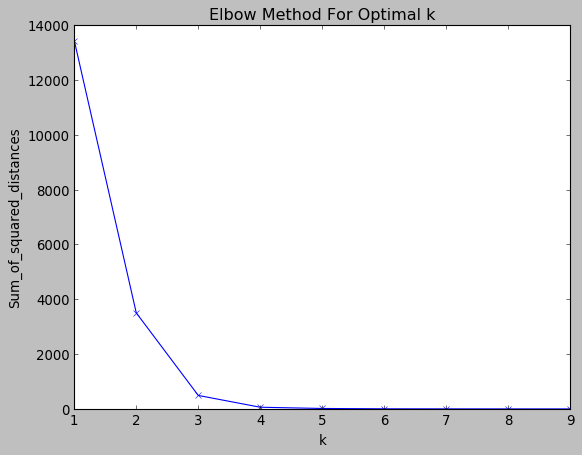

In [132]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(dataset_scaled [['Power' , 'I1', 'V1']])
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [133]:
dataset_scaled_test = dataset_scaled [['Power' , 'I1', 'V1']]
kmeans = KMeans(n_clusters=7)
kmeans = kmeans.fit(dataset_scaled_test)
labels = kmeans.predict(dataset_scaled_test)
labels

array([4, 4, 4, ..., 0, 0, 0])

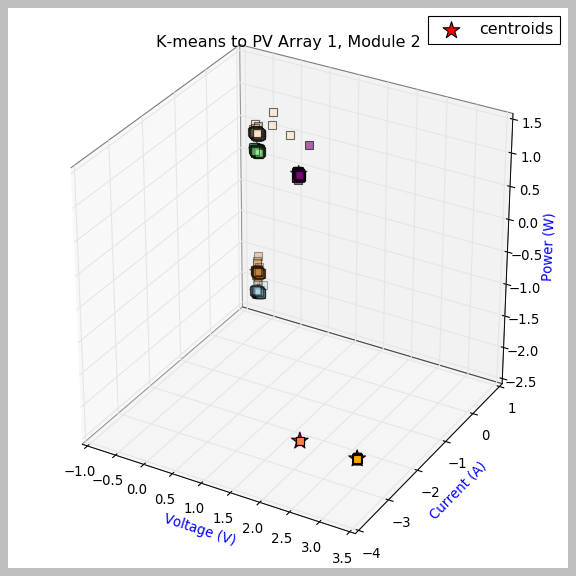

In [134]:
colores = ['lightgreen','orange','lightblue', 'purple','bisque', 'peru', 'coral']
asignar=[]
for row in labels:
    asignar.append(colores[row])
plt.style.use('_classic_test')
fig = plt.figure(figsize=(7,7))
#ax = fig.gca(projection='3d')
ax = Axes3D(fig)
ax.scatter(dataset_scaled_test.iloc[:, 2], dataset_scaled_test.iloc[:, 1], dataset_scaled_test.iloc[:, 0], 
          c=asignar, marker='s', s=50, edgecolor='black')
ax.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 1], 
           kmeans.cluster_centers_[:, 0], marker='*', c='red', edgecolor='black', s=250, label='centroids')

ax.legend(scatterpoints=1)
#ax.legend(loc='upper right', fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')

ax.tick_params(axis='x', labelcolor='black')
ax.tick_params(axis='y', labelcolor='black')
ax.tick_params(axis='z', labelcolor='black')
ax.set_xlabel('Voltage (V)',color='blue')
ax.set_ylabel('Current (A)',color='blue')
ax.set_zlabel('Power (W)',color='blue')
ax.set_title('K-means to PV Array 1, Module 2')
plt.savefig('K-means to PV Array 1, Module 2.png')
plt.show()